**General Idea**: There is a time/independent/response variable and a target variable. We try to understand the characteristics of the time variable with time and use this to predict/forecast the target variable at a point in time.
A time series would be of the following types:
1. Trend: The divergence would be continuous in nature. Can be positive/negative/null trend.Its either upward or downsward trend and hence it's easy to predict.
2. Seasonality: Can be a bell curve or saw tooth. The pattern may be repeatable and hence its easy to predict.
3. Cyclical: There is no fixed time interval and there can be uncertainity in the movement and its pattern. Hence, it is difficult to predict.
4. Irregularity: This is similar to Cyclical, but even more erratic and unexpected than it. This is also difficult to predict.

**Time Series Methods**
1. Moving Average Methodology
    - Simple Moving Average(SMA) 
    - Cumulative Moving Average(CMA)
    - Exponentail Moving Average(EMA)
2. Auto-Regressive(AR) model
3. Moving Average(MV) model
4. AutoRegressive Moving Average(ARMA) model
5. ARIMA

# Moving Average Methodology

In this method, the Moving Average(MA) is calculated by taking average of data within a time period - k.

## Simple Moving Average(SMA)
It is the mean of the previous M months

SMA<sub>t</sub> = (x<sub>t</sub> + x<sub>t-1</sub> + x<sub>M-(t-1)</sub>)/M

Excercise: to get the SMA of 10 years & 20 years period of air temperature in Barcelona

In [16]:
import pandas as pd

df_temp = pd.read_csv("temperaturesbarcelonadesde1780.csv")
df_temp.head()

,Any,Temp_Mitjana_Gener,Temp_Mitjana_Febrer,Temp_Mitjana_Marc,Temp_Mitjana_Abril,Temp_Mitjana_Maig,Temp_Mitjana_Juny,Temp_Mitjana_Juliol,Temp_Mitjana_Agost,Temp_Mitjana_Setembre,Temp_Mitjana_Octubre,Temp_Mitjana_Novembre,Temp_Mitjana_Desembre
0,1780,6.7,7.3,11.6,11.4,16.3,19.1,21.4,22.0,20.3,16.3,9.2,7.3
1,1781,7.5,8.9,10.9,13.7,16.8,18.0,22.0,22.6,19.1,15.0,11.8,10.3
2,1782,8.2,6.1,9.8,10.5,15.4,20.1,22.3,22.6,19.9,13.8,7.4,7.5
3,1783,8.3,8.6,9.6,12.4,15.0,19.1,22.9,21.4,18.6,15.5,11.0,10.4
4,1784,7.3,7.1,10.8,10.7,16.7,20.7,22.0,20.5,20.0,13.8,8.5,5.3


In [17]:
#Check if the data needs to be cleaned. For that get more information on data.
df_temp.info() #All fields are non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Any                    241 non-null    int64  
 1   Temp_Mitjana_Gener     241 non-null    float64
 2   Temp_Mitjana_Febrer    241 non-null    float64
 3   Temp_Mitjana_Marc      241 non-null    float64
 4   Temp_Mitjana_Abril     241 non-null    float64
 5   Temp_Mitjana_Maig      241 non-null    float64
 6   Temp_Mitjana_Juny      241 non-null    float64
 7   Temp_Mitjana_Juliol    241 non-null    float64
 8   Temp_Mitjana_Agost     241 non-null    float64
 9   Temp_Mitjana_Setembre  241 non-null    float64
 10  Temp_Mitjana_Octubre   241 non-null    float64
 11  Temp_Mitjana_Novembre  241 non-null    float64
 12  Temp_Mitjana_Desembre  241 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 24.6 KB


In [19]:
#Set the Any column as index and rename it to year.
df_temp.set_index('Any', inplace=True)
df_temp.index.name = 'Year'
df_temp.head()

KeyError: "None of ['Any'] are in the columns"

In [21]:
df_temp['avg_temp'] = df_temp.mean(axis=1)
df_temp.head()

,Temp_Mitjana_Gener,Temp_Mitjana_Febrer,Temp_Mitjana_Marc,Temp_Mitjana_Abril,Temp_Mitjana_Maig,Temp_Mitjana_Juny,Temp_Mitjana_Juliol,Temp_Mitjana_Agost,Temp_Mitjana_Setembre,Temp_Mitjana_Octubre,Temp_Mitjana_Novembre,Temp_Mitjana_Desembre,avg_temp
Year,,,,,,,,,,,,,
1780,6.7,7.3,11.6,11.4,16.3,19.1,21.4,22.0,20.3,16.3,9.2,7.3,14.075000
1781,7.5,8.9,10.9,13.7,16.8,18.0,22.0,22.6,19.1,15.0,11.8,10.3,14.716667
1782,8.2,6.1,9.8,10.5,15.4,20.1,22.3,22.6,19.9,13.8,7.4,7.5,13.633333
1783,8.3,8.6,9.6,12.4,15.0,19.1,22.9,21.4,18.6,15.5,11.0,10.4,14.400000
1784,7.3,7.1,10.8,10.7,16.7,20.7,22.0,20.5,20.0,13.8,8.5,5.3,13.616667


In [22]:
df_temp = df_temp[['avg_temp']]
df_temp.head()

,avg_temp
Year,
1780,14.075000
1781,14.716667
1782,13.633333
1783,14.400000
1784,13.616667


Text(0, 0.5, 'Temperature [C]')

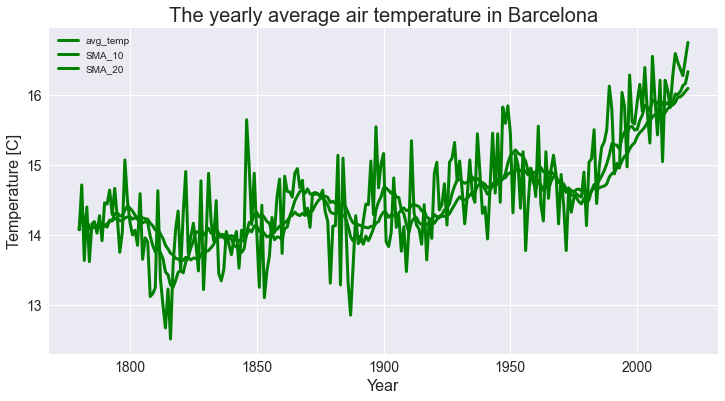

In [29]:
#Visualize the data
import matplotlib.pyplot as plt

#%matplotlib inline
plt.style.use('seaborn')

df_temp.plot(color='green', linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('The yearly average air temperature in Barcelona', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [C]', fontsize=16)

<ipython-input-27-79a1d50f57d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['SMA_10'] = df_temp.avg_temp.rolling(10, min_periods=1).mean()
<ipython-input-27-79a1d50f57d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['SMA_20'] = df_temp.avg_temp.rolling(20, min_periods=1).mean()


Text(0, 0.5, 'Temperature [°C]')

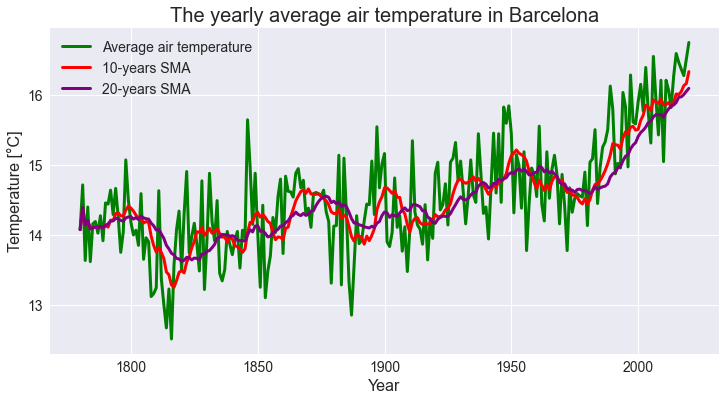

In [27]:
#Calculate the SMA for 10 and 20 years period
df_temp['SMA_10'] = df_temp.avg_temp.rolling(10, min_periods=1).mean()
df_temp['SMA_20'] = df_temp.avg_temp.rolling(20, min_periods=1).mean()

colors = ['green', 'red', 'purple']
df_temp.plot(color=colors, linewidth=3, figsize=(12,6))
# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average air temperature', '10-years SMA', '20-years SMA'], fontsize=14)

# title and labels
plt.title('The yearly average air temperature in Barcelona', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)